In [1]:
# !pip install ultralytics

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import cv2
import itertools

from PIL import Image
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# from ultralytics import YOLO

# Load Dataset

In [2]:
DIR = "WasteImagesDataset/"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, 
                                                                    subset="training", seed=42, 
                                                                    batch_size=16, smart_resize=True)

NotFoundError: Could not find directory WasteImagesDataset/

# Define Classes

In [2]:
classes = train_dataset.class_names

NameError: name 'train_dataset' is not defined

In [8]:
classes = ["biodegradable", "non-biodegradable"]

# Load Model

In [14]:
# load model
model = tf.keras.models.load_model('model_042924-1253H.keras')

# Show the model architecture
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [7]:
segmentation_model = YOLO('models/yolov8m-segmentation-turhancan.pt')

In [8]:
data_augmentation = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness(factor=0.3),
    tf.keras.layers.RandomContrast(factor=0.2),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
])

In [12]:
def is_biodegradable(image) -> bool:
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) 

    predictions = model.predict(img_array)
    print(predictions)
    return int(tf.round(predictions[0]).numpy()[0])

1/1 [==============================] - 0s 20ms/step
[[4.3526757e-07]]
0
['biodegradable', 'non-biodegradable']
Prediction:  biodegradable


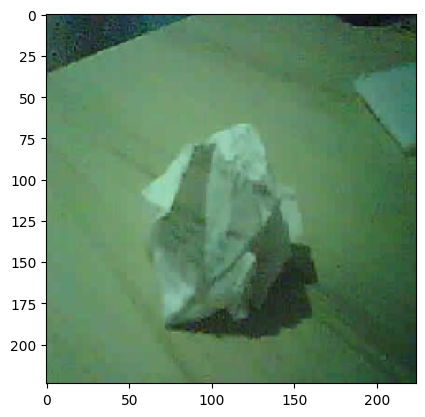

In [13]:
# url = "https://images.unsplash.com/photo-1577705998148-6da4f3963bc8?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FyZGJvYXJkfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"
# image = tf.keras.utils.get_file("images/paper.jpeg", origin=url)
path = "images/tests/random/file.jpg"
img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])

plt.imshow(img)
# print(predictions)
# print("Prediction: " + str(classes[np.argmax(predictions)]))
print(predictions)
# prediction = tf.round(predictions[0])
prediction = int(tf.round(predictions[0]).numpy()[0])
print(prediction)
print(classes)
print("Prediction: ", classes[prediction])

Found 5 files belonging to 1 classes.
1/1 [==============================] - 0s 44ms/step
[[0.9807387]]
1/1 [==============================] - 0s 156ms/step
[[0.9999347]]
1/1 [==============================] - 0s 40ms/step
[[0.99993765]]
1/1 [==============================] - 0s 39ms/step
[[0.7719588]]
1/1 [==============================] - 0s 39ms/step
[[0.99995124]]


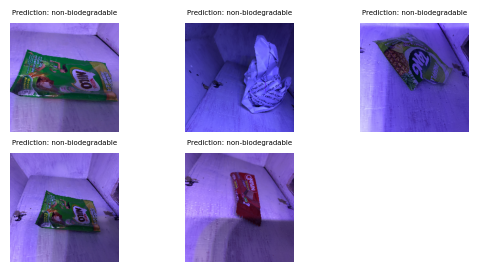

In [10]:
image_ds = tf.keras.utils.image_dataset_from_directory(
    '/notebooks/images/tests/random/eval',
    labels=None,
    batch_size=None,
    image_size=(224, 224)
)
# classes = train_dataset.class_names
# expand dimention at the front (axis=0)
image_ds_expanded = image_ds.map(lambda image: tf.expand_dims(image, axis=0))

# predict using model

plt.figure()
for i, img in enumerate(image_ds_expanded):
    # print(prediction[0]*100, "\n", classes)
    # print("Prediction: ", classes[np.argmax(prediction)], f"{prediction[np.argmax(prediction)]*100}%")
    pil_img = tf.keras.preprocessing.image.array_to_img(tf.reshape(img[0], (224, 224, 3)))
    plt.subplot(3, 3, i + 1)
    plt.imshow(pil_img)
    title = f"Prediction: {classes[int(is_biodegradable(pil_img))]}"
    plt.title(title, fontsize=5)
    plt.axis("off")

Found 5 files belonging to 1 classes.


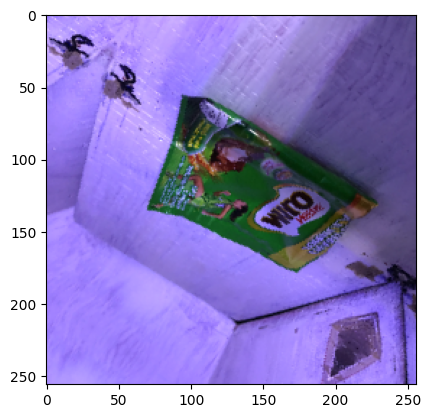

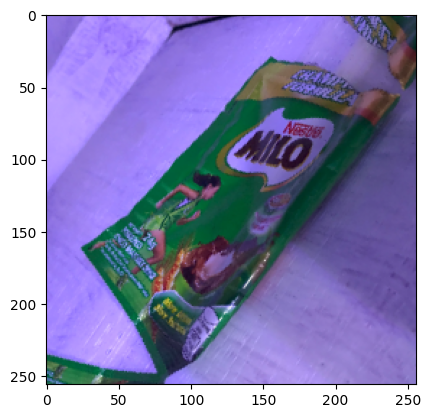

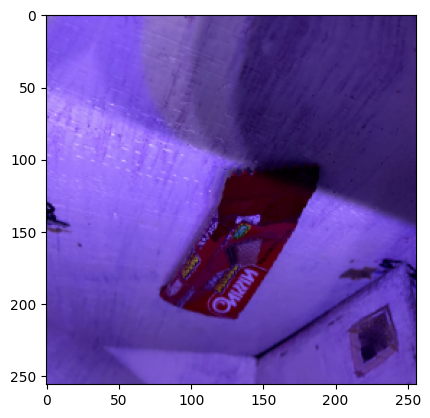

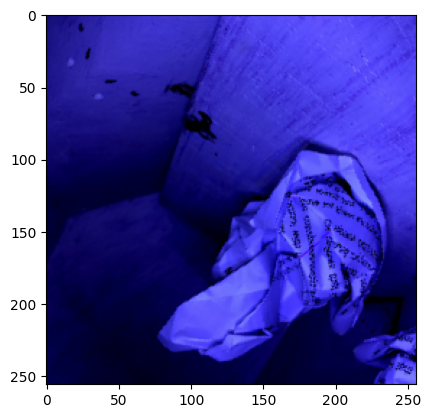

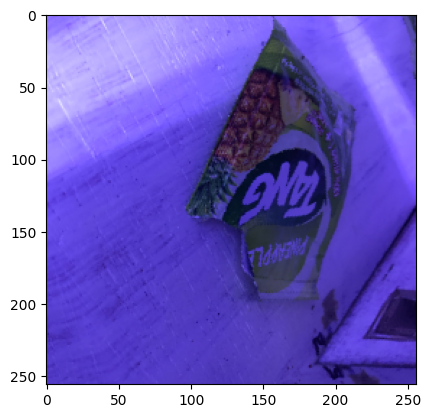

In [8]:
DIR = "/notebooks/images/tests/random/eval"

dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, labels=None)
dataset = dataset.map(lambda x: data_augmentation(x))

for img in dataset:
    for augmented in img:
        plt.figure()
        plt.imshow(tf.keras.utils.array_to_img(augmented))

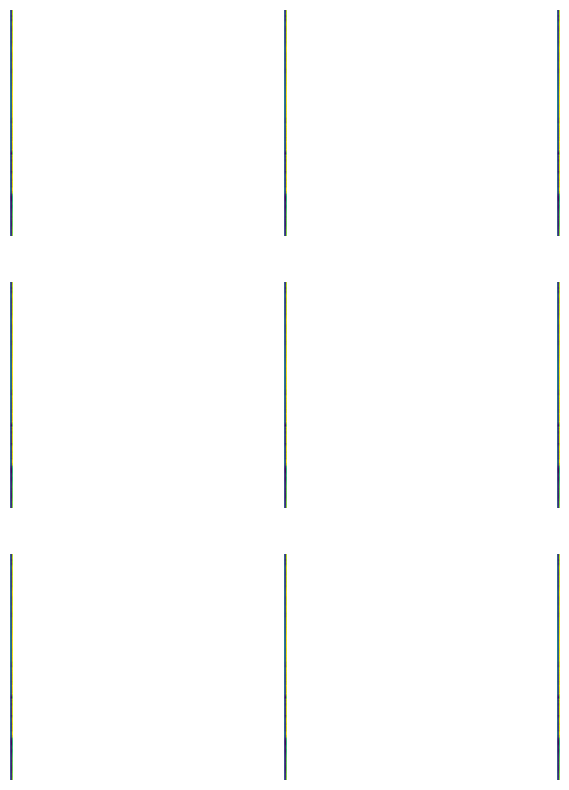

In [31]:
path = "/notebooks/images/tests/random/eval/IMG_3995 crpped.jpg"
image = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(image)
image = tf.cast(tf.expand_dims(img_array, 0), tf.float32)
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(img_array)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


# Single Image Testing

1/1 [==============================] - 0s 95ms/step
[1.0000000e+02 1.6436997e-18] 
 ['biodegradable', 'non-biodegradable']
Prediction:  biodegradable 100.0%


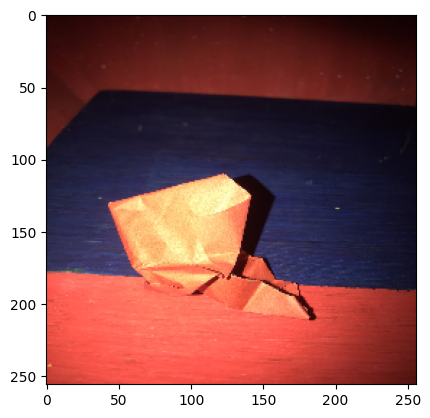

In [14]:
# url = "https://images.unsplash.com/photo-1577705998148-6da4f3963bc8?ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8Y2FyZGJvYXJkfGVufDB8fDB8fA%3D%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=500&q=60"
# image = tf.keras.utils.get_file("images/paper.jpeg", origin=url)
path = "/notebooks/images/tests/random/IMG_3523.jpeg"
img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# img_augmented = data_augmentation(img_array)
img_array_expanded = tf.expand_dims(img_array, 0) 

# results = segmentation_model.predict("/notebooks/images/tests/random/file.jpg", imgsz=256, show=False, save=False)
# results.show(labels=False)

predictions = model.predict(img_array_expanded)
#score = tf.nn.softmax(predictions[0])

plt.imshow(tf.keras.utils.array_to_img(img_array))
# print(predictions)
# print("Prediction: " + str(classes[np.argmax(predictions)]))
print(predictions[0]*100, "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

# Multi-Image Testing

In [13]:
image_ds = tf.keras.utils.image_dataset_from_directory(
    '/notebooks/images/tests/random',
    labels=None,
    batch_size=None
)
# classes = train_dataset.class_names
# expand dimention at the front (axis=0)
# image_ds_expanded = tf.expand_dims(image_ds, axis=0)
# predict using model
predictions = model.predict(image_ds)
plt.figure()
for prediction, image_array, i in zip(predictions, image_ds, range(len(predictions))):
    print(prediction[0]*100, "\n", classes)
    print("Prediction: ", classes[np.argmax(prediction)], f"{prediction[np.argmax(prediction)]*100}%")
    
    pil_img = tf.keras.preprocessing.image.array_to_img(image_array)
    plt.subplot(3, 3, i + 1)
    plt.imshow(pil_img)
    title = f"Prediction: {classes[np.argmax(prediction)]} {prediction[np.argmax(prediction)]*100:.2f}%"
    plt.title(title, fontsize=5)
    plt.axis("off")


Found 5 files belonging to 1 classes.


InvalidArgumentError: Graph execution error:

Detected at node 'model/conv1_pad/Pad' defined at (most recent call last):
    File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.9/dist-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/usr/local/lib/python3.9/dist-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.9/dist-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/usr/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/usr/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/usr/local/lib/python3.9/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_243/2485952950.py", line 10, in <module>
      predictions = model.predict(image_ds)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.9/dist-packages/keras/layers/reshaping/zero_padding2d.py", line 143, in call
      return backend.spatial_2d_padding(
    File "/usr/local/lib/python3.9/dist-packages/keras/backend.py", line 3770, in spatial_2d_padding
      return tf.compat.v1.pad(x, pattern)
Node: 'model/conv1_pad/Pad'
The first dimension of paddings must be the rank of inputs[4,2] [256,256,3]
	 [[{{node model/conv1_pad/Pad}}]] [Op:__inference_predict_function_17592]

### Exhaustive

Found 63 files belonging to 1 classes.
TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)


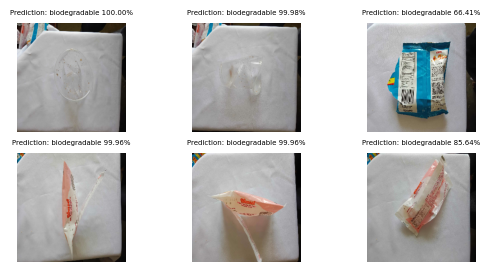

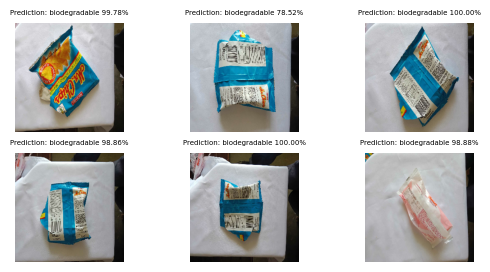

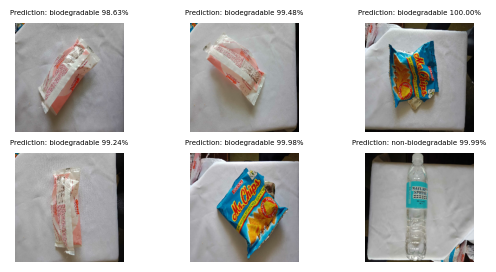

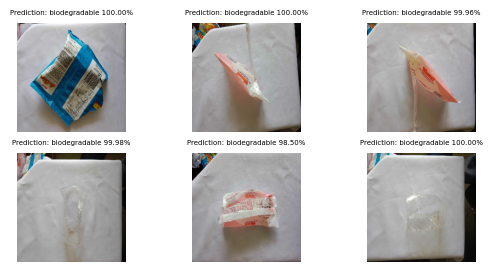

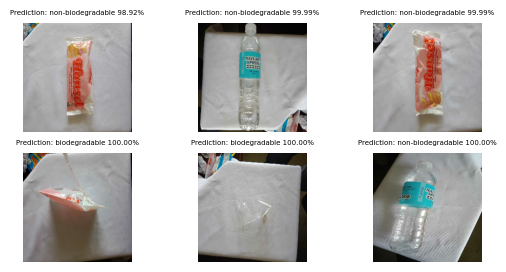

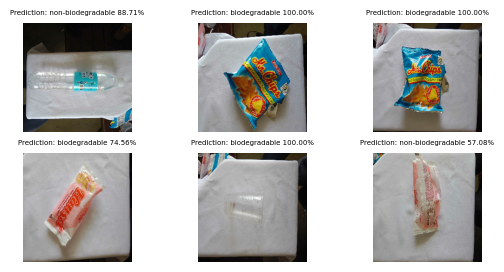

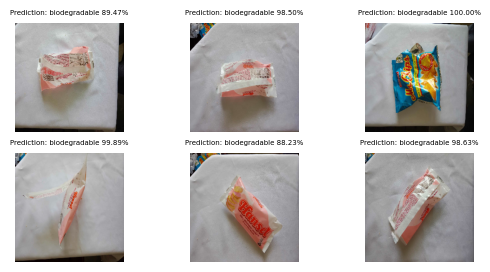

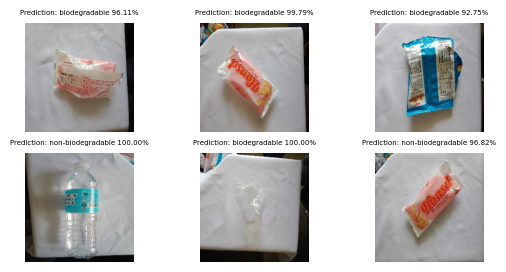

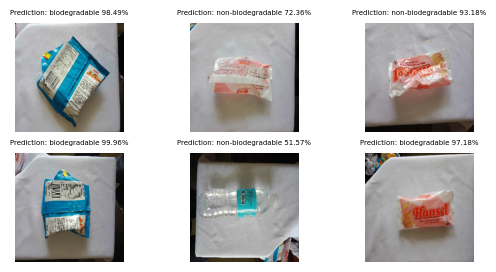

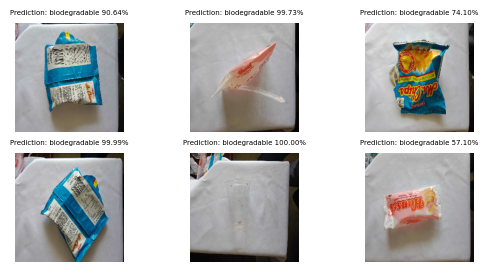

In [ ]:
# buggy
BATCH_SIZE = 6
image_ds = tf.keras.utils.image_dataset_from_directory(
    '/notebooks/images/tests/test_1',
    labels=None,
    batch_size=BATCH_SIZE
)
# classes = train_dataset.class_names
# expand dimention at the front (axis=0)
print(image_ds.element_spec)

for batch in image_ds:
    predictions = model.predict_on_batch(batch)
    plt.figure()
    for i, pair in enumerate(zip(predictions, batch)):
        prediction, img = pair
        # print(prediction[0]*100, "\n", classes)
        # print("Prediction: ", classes[np.argmax(prediction)], f"{prediction[np.argmax(prediction)]*100}%")
        
        # pil_img = tf.keras.preprocessing.image.array_to_img(tf.reshape(img[0], (256, 256, 3)))
        pil_img = tf.keras.preprocessing.image.array_to_img(img)
        plt.subplot(3, 3, i + 1)
        plt.imshow(pil_img)
        title = f"Prediction: {classes[np.argmax(prediction)]} {prediction[np.argmax(prediction)]*100:.2f}%"
        plt.title(title, fontsize=5)
        plt.axis("off")